# <center>DIWALI SALES ANALYSIS<br>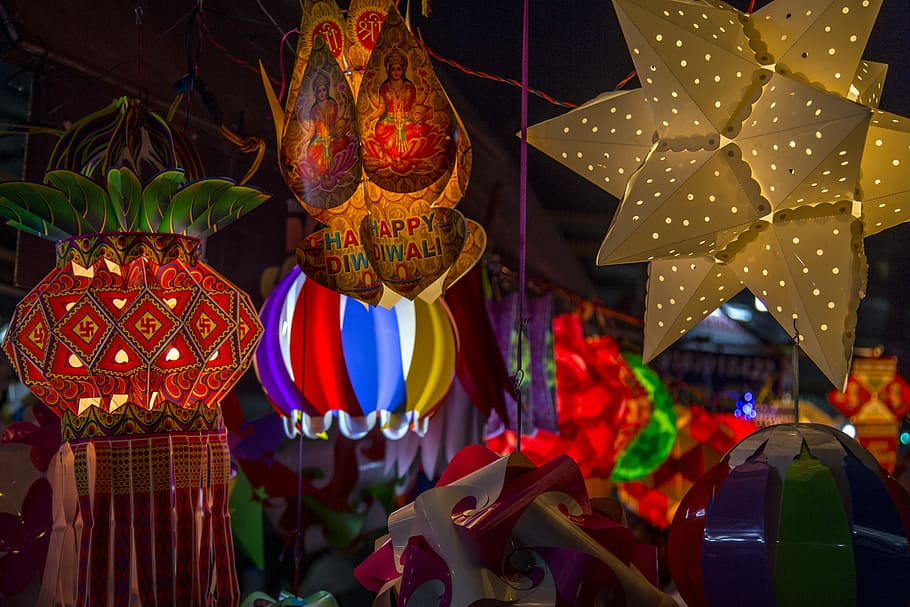

DataSource: - https://www.kaggle.com/datasets/prajwal6362venom/diwali-sales

## About Dataset: 
Description: This dataset contains sales data for a retail store during the Diwali festival period in India. The data includes information on the products sold, their categories, the sales channels, the dates and times of sale, the sale prices, and the quantities sold.

### Fields:

**Product ID**: The unique identifier for each product sold<br>
**Product Category**: The category of each product (e.g. electronics, clothing, home decor)<br>
**Channel**: The sales channel through which the product was sold (e.g. online, in-store)<br>
**Date**: The date on which the product was sold<br>
**Time**: The time at which the product was sold<br>
**Sale Price**: The price at which the product was sold<br>
**Quantity**: The number of units sold of each product<br>
**Sample Size**: 10,000+ rows<br>
**Gender**: Male and Female<br>
**Marital_Status**: 0 for Unmarried, 1 for Married<br>
**State**: A bunch of states<br>
**Zone**: Central, Eastern, Northern, Southern and Western <br>
**Occupation**: Healthcare, Govt, etc<br>
**Product_Category**: ex. Foor, Electronics, Auto, etc.<br>
**Orders**: Numeric Value

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Loading Dataset
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')
print(df.shape)
df.head(2)

(11251, 15)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1','User_ID'], axis=1, inplace=True)

In [6]:
#check for null values
pd.isnull(df).sum()

Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
# drop null values
df.dropna(inplace=True)

In [8]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [9]:
df['Amount'].dtypes

dtype('int32')

In [10]:
df.columns

Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [11]:
# getting rough idea about the data
df.describe()

,Age,Marital_Status,Orders,Amount
count,11239.000000,11239.000000,11239.000000,11239.000000
mean,35.410357,0.420055,2.489634,9453.610553
std,12.753866,0.493589,1.114967,5222.355168
min,12.000000,0.000000,1.000000,188.000000
25%,27.000000,0.000000,2.000000,5443.000000
50%,33.000000,0.000000,2.000000,8109.000000
75%,43.000000,1.000000,3.000000,12675.000000
max,92.000000,1.000000,4.000000,23952.000000


In [12]:
# Final Dataset
print(df.shape)
df.head(2)

(11239, 12)


,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


In [13]:
# Finding any Relation Between Dataset
df.corr().iloc[:-1,:-1]

,Age,Marital_Status,Orders
Age,1.000000,-0.012344,0.008090
Marital_Status,-0.012344,1.000000,-0.003487
Orders,0.008090,-0.003487,1.000000


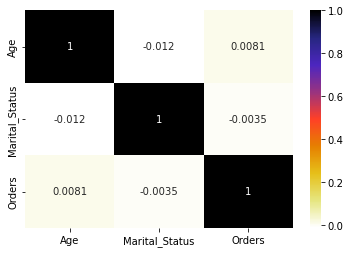

In [14]:
# Visualizing
sns.heatmap(df.corr().iloc[:-1,:-1], annot=True, cmap=plt.cm.CMRmap_r);

# Exploratory Data Analysis

In [15]:
# Gender count
df.Gender.value_counts()

F    7832
M    3407
Name: Gender, dtype: int64

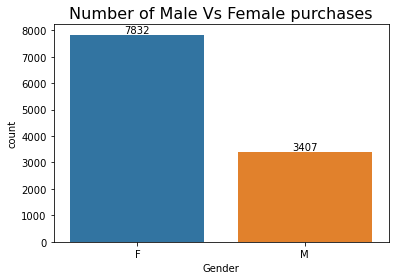

In [16]:
# Analysing gender value count visually

ax = sns.countplot(x = 'Gender',data = df)
plt.title("Number of Male Vs Female purchases", fontsize=16)
for bars in ax.containers:
    ax.bar_label(bars)

#### Female purchases more than Male

In [17]:
df['Tot_amount'] = df['Amount']*df.Orders
df.head(2)

,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Tot_amount
0,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,23952
1,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,71802


In [18]:
# Total amount spend by female and male
df.groupby(['Gender'])['Tot_amount'].mean()

Gender
F    23660.225485
M    22997.332844
Name: Tot_amount, dtype: float64

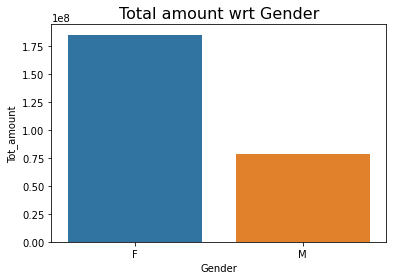

In [19]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Tot_amount'].sum().sort_values(by='Tot_amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Tot_amount' ,data = sales_gen)
plt.title("Total amount wrt Gender", fontsize=16)
plt.show()

**From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men**

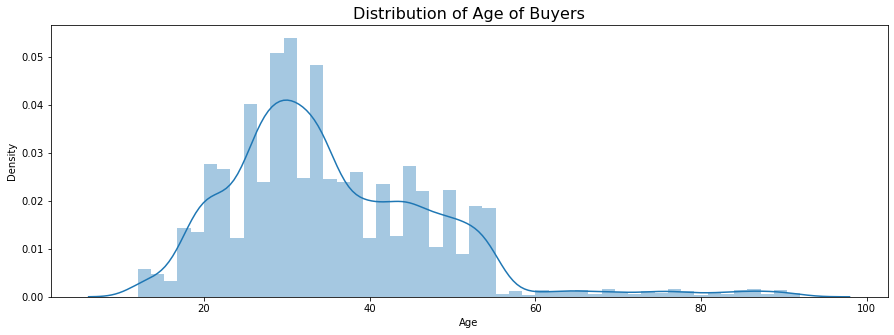

In [20]:
# Distribution of Age
plt.figure(figsize=(15,5), facecolor='white')
sns.distplot(df.Age)
plt.title("Distribution of Age of Buyers", fontsize=16)
plt.show()

In [21]:
# Number of Male and Female based on Age Group
df.groupby(['Age Group','Gender'])['Gender'].count()

Age Group  Gender
0-17       F          162
           M          134
18-25      F         1305
           M          574
26-35      F         3269
           M         1272
36-45      F         1578
           M          705
46-50      F          693
           M          290
51-55      F          553
           M          277
55+        F          272
           M          155
Name: Gender, dtype: int64

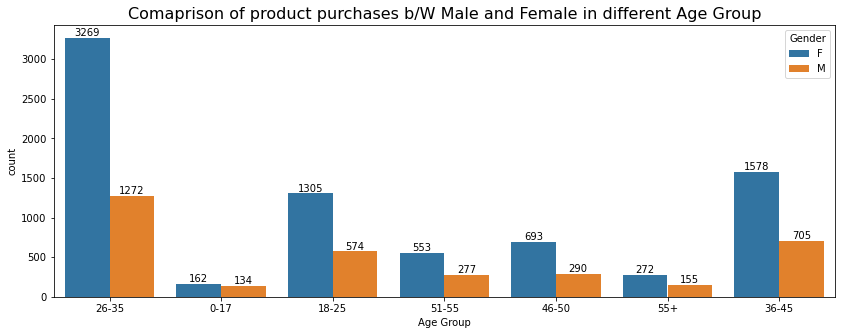

In [22]:
# Analysing above data Visually
plt.figure(figsize=(14,5))
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
plt.title("Comaprison of product purchases b/W Male and Female in different Age Group", fontsize=16)
for bars in ax.containers:
    ax.bar_label(bars)

**Clearly In each Age Group Female purchases more the Male**

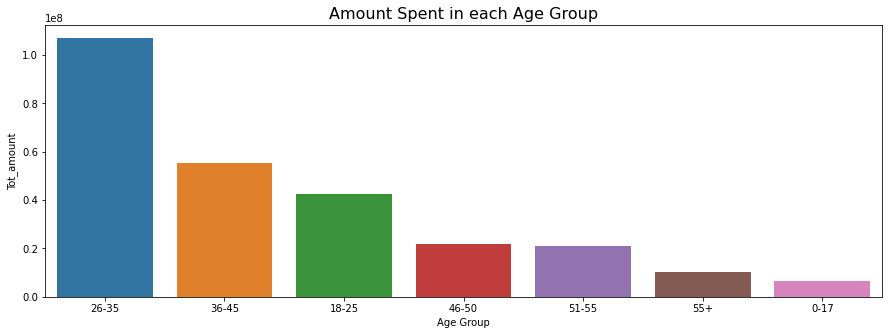

In [23]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Tot_amount'].sum().sort_values(by='Tot_amount', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x = 'Age Group',y= 'Tot_amount' ,data = sales_age)
plt.title("Amount Spent in each Age Group", fontsize=16)
plt.show()

**From above graphs we can see that most of the buyers are of age group between 26-35 yrs female and the highest amount is spent by them too.**

In [24]:
# Orders based on Region

df.groupby(['Zone'])['Orders'].sum()

Zone
Central     10623
Eastern      2015
Northern     3727
Southern     6740
Western      4876
Name: Orders, dtype: int64

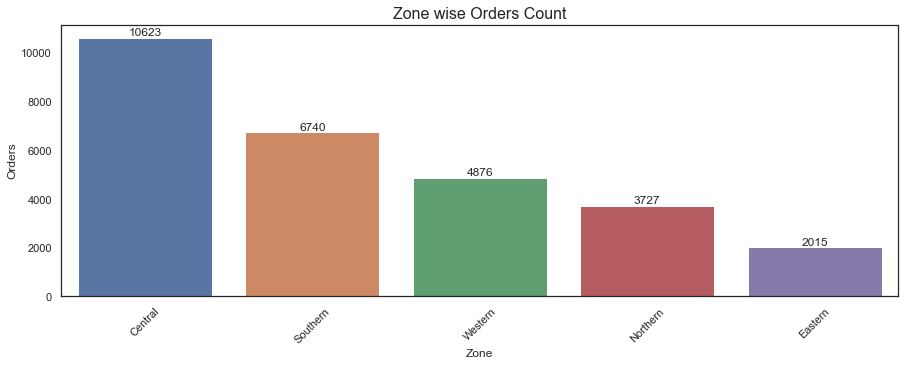

In [25]:
# Orders based on Region

sales_zone = df.groupby(['Zone'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
ax = sns.barplot(data = sales_zone, x = 'Zone',y= 'Orders')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title("Zone wise Orders Count", fontsize=16)
plt.show()

In [26]:
# total amount/sales from 10 Zone

df.groupby(['Zone'])['Tot_amount'].sum()

Zone
Central     102879270
Eastern      17355199
Northern     31323356
Southern     66363017
Western      45737957
Name: Tot_amount, dtype: int64

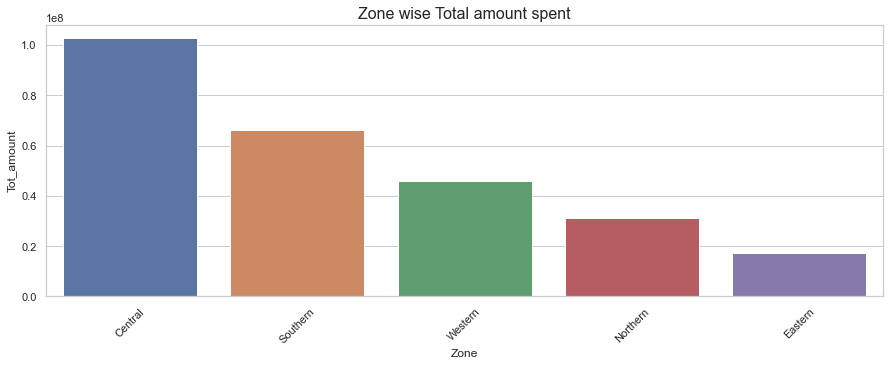

In [27]:
# total amount/sales from top 10 states

sales_zone = df.groupby(['Zone'], as_index=False)['Tot_amount'].sum().sort_values(by='Tot_amount', ascending=False)

sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("whitegrid")
ax = sns.barplot(data = sales_zone, x = 'Zone',y= 'Tot_amount')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.title("Zone wise Total amount spent", fontsize=16)
plt.show()

In [28]:
# Orders based on States

df.groupby(['State'])['Orders'].sum()

State
Andhra Pradesh      2051
Bihar               1062
Delhi               2740
Gujarat             1066
Haryana             1109
Himachal Pradesh    1568
Jharkhand            953
Karnataka           3240
Kerala              1137
Madhya Pradesh      2252
Maharashtra         3810
Punjab               495
Rajasthan            555
Telangana            312
Uttar Pradesh       4807
Uttarakhand          824
Name: Orders, dtype: int64

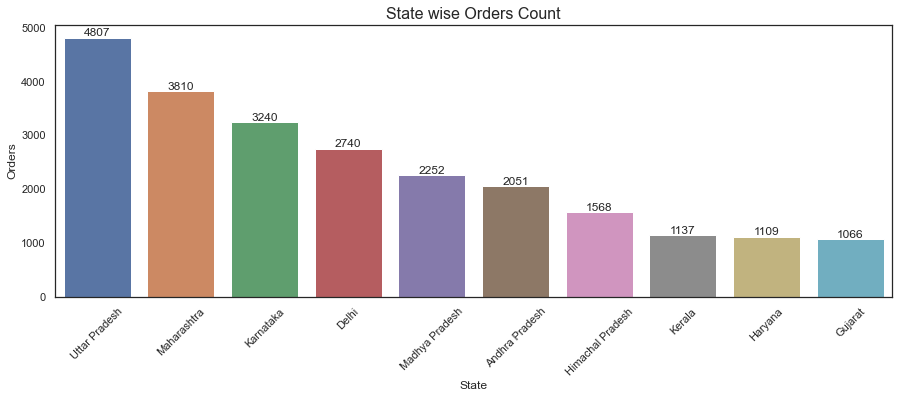

In [29]:
# Orders based on States

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
ax = sns.barplot(data = sales_state, x = 'State',y= 'Orders')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title("State wise Orders Count", fontsize=16)
plt.show()

In [30]:
# total amount/sales from top 10 states

df.groupby(['State'])['Tot_amount'].sum()

State
Andhra Pradesh      20424083
Bihar                9758622
Delhi               29013355
Gujarat              9707424
Haryana             10279844
Himachal Pradesh    12761065
Jharkhand            7596577
Karnataka           33504738
Kerala               9476959
Madhya Pradesh      19677621
Maharashtra         36030533
Punjab               3743191
Rajasthan            4539256
Telangana            2957237
Uttar Pradesh       47719066
Uttarakhand          6469228
Name: Tot_amount, dtype: int64

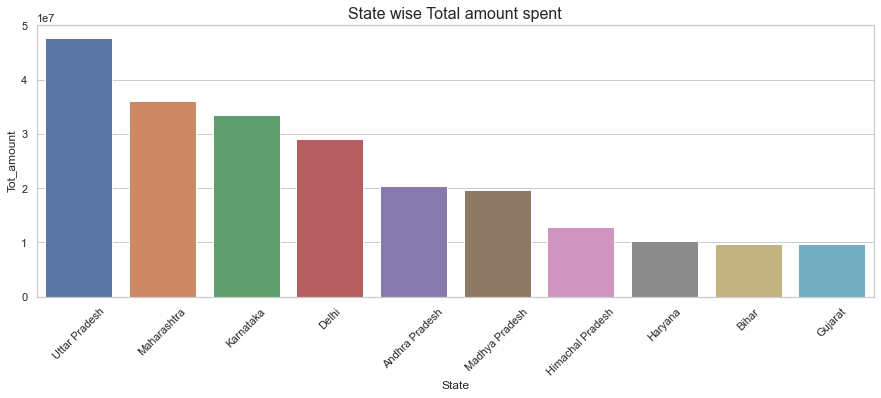

In [31]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Tot_amount'].sum().sort_values(by='Tot_amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("whitegrid")
ax = sns.barplot(data = sales_state, x = 'State',y= 'Tot_amount')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.title("State wise Total amount spent", fontsize=16)
plt.show()

In [32]:
# Grouping
df.groupby(['Zone','State'], as_index=True)[['Orders','Tot_amount']].sum()

Orders  Tot_amount
Zone     State                               
Central  Delhi               2740    29013355
         Madhya Pradesh      2252    19677621
         Uttar Pradesh       4807    47719066
         Uttarakhand          824     6469228
Eastern  Bihar               1062     9758622
         Jharkhand            953     7596577
Northern Haryana             1109    10279844
         Himachal Pradesh    1568    12761065
         Punjab               495     3743191
         Rajasthan            555     4539256
Southern Andhra Pradesh      2051    20424083
         Karnataka           3240    33504738
         Kerala              1137     9476959
         Telangana            312     2957237
Western  Gujarat             1066     9707424
         Maharashtra         3810    36030533

**From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka**

In [33]:
# Finding buyer is married or not

df.Marital_Status.value_counts()

0    6518
1    4721
Name: Marital_Status, dtype: int64

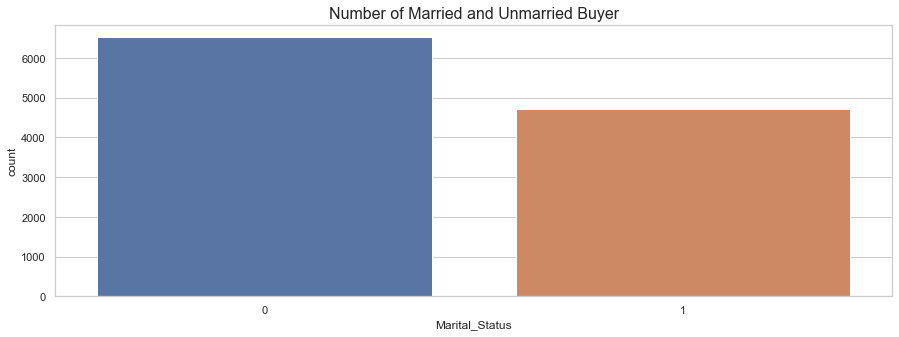

In [34]:
# Finding Buyer is Married or not

ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("whitegrid")
plt.title("Number of Married and Unmarried Buyer", fontsize=16)
plt.show()

In [35]:
# finding the amount spent based on Marital Status and Gender
df.groupby(['Marital_Status', 'Gender'])['Amount'].sum()

Marital_Status  Gender
0               F         43786646
                M         18338738
1               F         30549207
                M         13574538
Name: Amount, dtype: int32

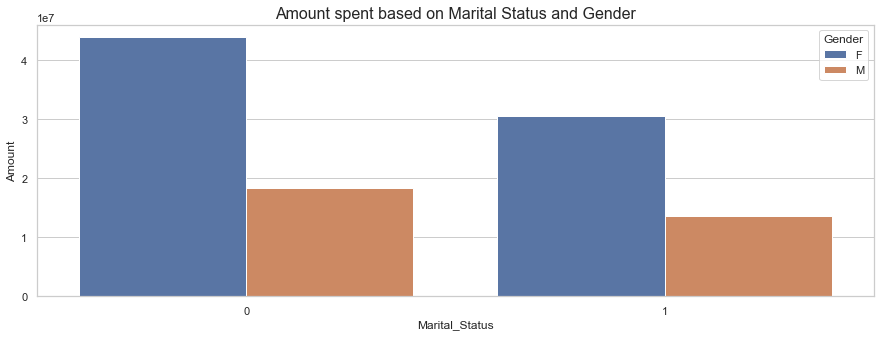

In [36]:
# Visualizing the amount spent based on Marital Status and Gender

sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("whitegrid")
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

plt.title("Amount spent based on Marital Status and Gender", fontsize=16)
plt.show()

**From above graphs we can see that most of the buyers are unmarried (women) and they have high purchasing power**

In [37]:
# Which occupation buying more
df.Occupation.value_counts()

IT Sector          1583
Healthcare         1408
Aviation           1310
Banking            1137
Govt                854
Hospitality         703
Media               637
Automobile          565
Chemical            541
Lawyer              531
Retail              501
Food Processing     423
Construction        414
Textile             349
Agriculture         283
Name: Occupation, dtype: int64

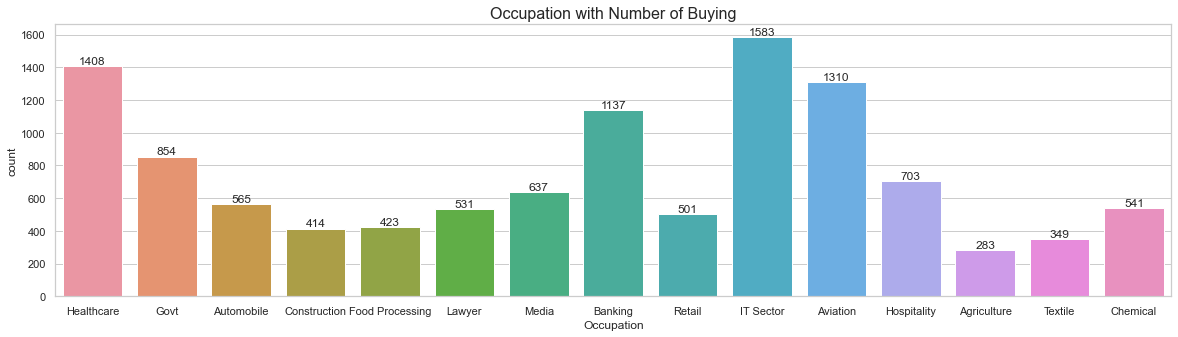

In [38]:
# Visualizing
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("whitegrid")
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Occupation with Number of Buying", fontsize=16)
plt.show()

In [39]:
# Amount spent by each Occupation
df.groupby(['Occupation'])['Tot_amount'].sum()

Occupation
Agriculture         6525400
Automobile         13059402
Aviation           31109857
Banking            26760629
Chemical           12889297
Construction        8853816
Food Processing    10246639
Govt               21326122
Healthcare         31951139
Hospitality        15454040
IT Sector          37076606
Lawyer             12593296
Media              15698239
Retail             12210520
Textile             7903797
Name: Tot_amount, dtype: int64

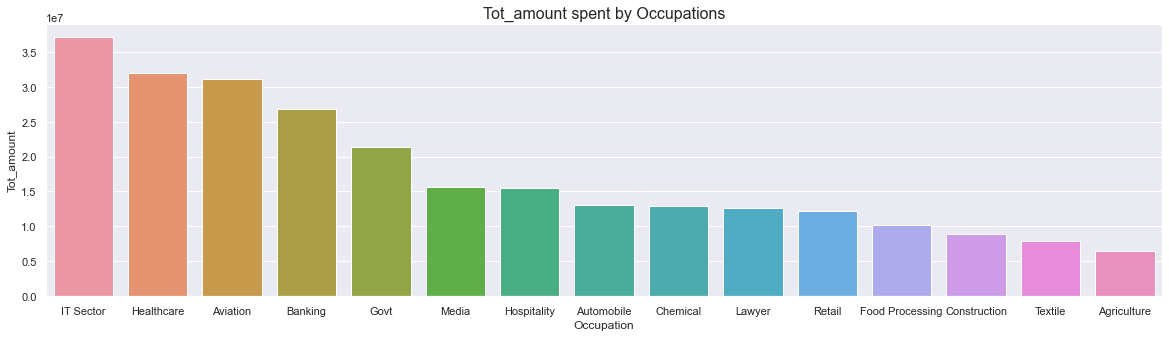

In [40]:
# Visualizing Amount spent by each Occupation
sales_state = df.groupby(['Occupation'], as_index=False)['Tot_amount'].sum().sort_values(by='Tot_amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Tot_amount')

sns.set_style("whitegrid")
plt.title("Tot_amount spent by Occupations",fontsize=16)
plt.show()

**From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector**

In [41]:
# Finding which category has been purchased more
df.Product_Category.value_counts()

Clothing & Apparel       2655
Food                     2490
Electronics & Gadgets    2087
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                       97
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: Product_Category, dtype: int64

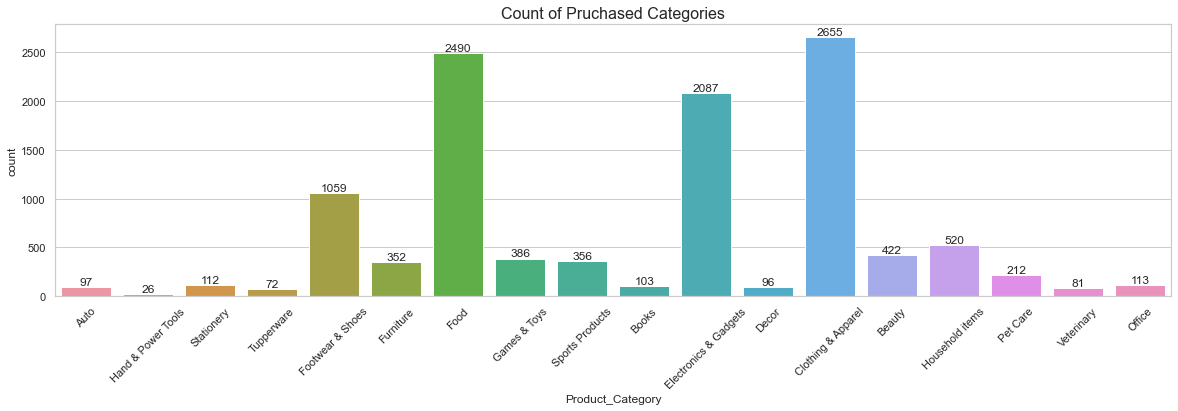

In [42]:
# Visualizing which category has been purchased more
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("whitegrid")
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title("Count of Pruchased Categories", fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [43]:
# Finding which category has been Amounted more
df.groupby(['Product_Category'])['Tot_amount'].sum()

Product_Category
Auto                      4813176
Beauty                    5051461
Books                     2544203
Clothing & Apparel       41164094
Decor                     1777329
Electronics & Gadgets    39315276
Food                     83591271
Footwear & Shoes         38731503
Furniture                13660127
Games & Toys             10441249
Hand & Power Tools        1224798
Household items           4029632
Office                     186418
Pet Care                  1229718
Sports Products           8856019
Stationery                4122818
Tupperware                2633202
Veterinary                 286505
Name: Tot_amount, dtype: int64

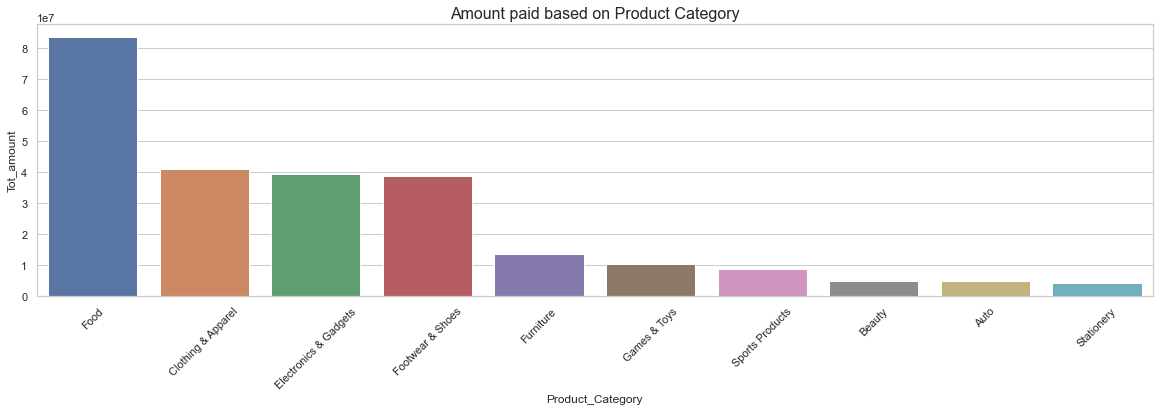

In [44]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Tot_amount'].sum().sort_values(
    by='Tot_amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.set_style(style='whitegrid')
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Tot_amount')
plt.xticks(rotation=45)
plt.title("Amount paid based on Product Category", fontsize=16)
plt.show()

**From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category**

In [45]:
# Most Ordered Product
hd = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
hd

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
679,P00114942,79
171,P00025442,79
708,P00117942,76
888,P00145042,76
298,P00044442,75
643,P00110842,74


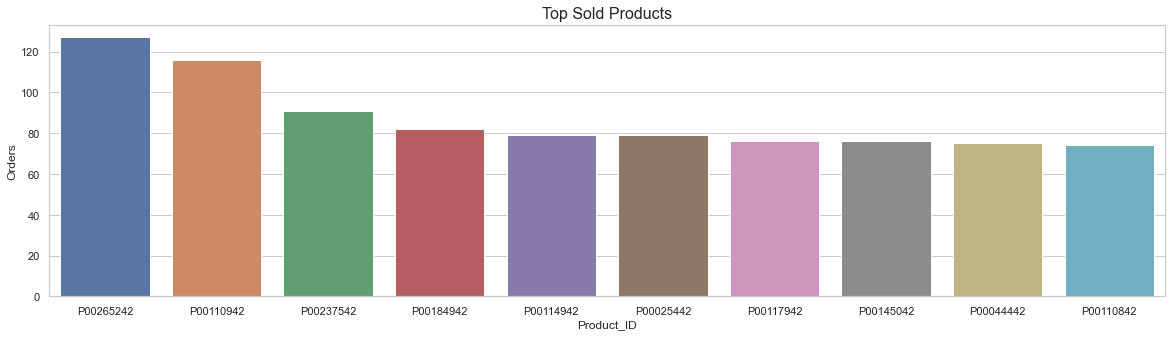

In [46]:
# Visualizing Most Ordered Product
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.set_style('whitegrid')
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

plt.title("Top Sold Products", fontsize=16)
plt.show()

In [47]:
# Displaying the record of top 5 most purchased products

df[df.Product_ID.isin(np.array(hd.Product_ID.head(5)))]

,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Tot_amount
1,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,71802
62,Bruce,P00265242,F,26-35,33,0,Maharashtra,Western,Govt,Stationery,4,21325,85300
113,Arti,P00184942,F,26-35,35,0,Uttar Pradesh,Central,Food Processing,Stationery,1,20883,20883
134,Philippe,P00114942,M,46-50,46,1,Karnataka,Southern,Hospitality,Footwear & Shoes,1,20815,20815
188,McCrossin,P00110942,M,36-45,41,0,Himachal Pradesh,Northern,Banking,Furniture,4,20622,82488
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,Naresj,P00110942,F,36-45,45,0,Karnataka,Southern,Retail,Household items,2,1570,3140
11091,Black,P00237542,F,55+,69,1,Madhya Pradesh,Central,IT Sector,Veterinary,2,1073,2146
11128,Liz,P00114942,F,18-25,22,1,Delhi,Central,Banking,Office,1,927,927
11190,Irving,P00184942,F,26-35,28,1,Delhi,Central,Aviation,Office,2,744,1488


## Conclusion

### More Focused on:
**1. Unmarried Women<br>2. Age Group 26-35<br>3. Food, Clothing and Electronics category<br>4. IT, Healthcare and Aviation sector<br>5. Uttar Pradesh, Maharashtra and Karnataka States(All belong to different Zones)<br>6. Central Zone overall has more orders.**

# <center>Thank you!